<a href="https://colab.research.google.com/github/yaajnu/ColabNotebooks/blob/master/Sports_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Copy folder to new
!cp -av "/content/drive/My Drive/open-data-master" "/content/open-data-master"
# Remove original folder, subfolder and files

'/content/drive/My Drive/open-data-master' -> '/content/open-data-master'


In [2]:
import json
import numpy as np
from pandas import json_normalize
path='./drive/My Drive/open-data-master/data/'
with open('./drive/My Drive/open-data-master/data/competitions.json') as data_file:    
    data = json.load(data_file)
df = json_normalize(data, sep = "_")

In [3]:
df

,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
0,16,4,Europe,Champions League,male,2018/2019,2020-07-29T05:00,2020-07-29T05:00
1,16,1,Europe,Champions League,male,2017/2018,2020-07-29T05:00,2020-07-29T05:00
2,16,2,Europe,Champions League,male,2016/2017,2020-08-26T12:33:15.869622,2020-07-29T05:00
3,16,27,Europe,Champions League,male,2015/2016,2020-08-26T12:33:15.869622,2020-07-29T05:00
4,16,26,Europe,Champions League,male,2014/2015,2020-08-26T12:33:15.869622,2020-07-29T05:00
5,16,25,Europe,Champions League,male,2013/2014,2020-08-26T12:33:15.869622,2020-07-29T05:00
6,16,24,Europe,Champions League,male,2012/2013,2020-08-26T12:33:15.869622,2020-07-29T05:00
7,16,23,Europe,Champions League,male,2011/2012,2020-08-26T12:33:15.869622,2020-07-29T05:00
8,16,22,Europe,Champions League,male,2010/2011,2020-07-29T05:00,2020-07-29T05:00
9,16,21,Europe,Champions League,male,2009/2010,2020-07-29T05:00,2020-07-29T05:00


In [4]:
import os,re
matchpath=path+'matches/11'
a=os.listdir(path+'matches/11')
regex=re.compile('(.*).json')
f=regex.search(a[1])
values=[]
for b,i in enumerate(a):
  try:
    values.append(regex.search(i).group(1))

  except:
    print(type(i))
    continue


In [5]:
values
df_variables=['df'+i for i in values]
df_variables
df_dict={}
for i in df_variables:
  df_dict[i]=0

In [6]:
for var,i in zip(df_variables,values):
  filename=matchpath+'/'+i+'.json'
  with open(filename) as data_file:  
    data = json.load(data_file)
    df_dict[var]= json_normalize(data, sep = "_")


In [7]:
df_dict

{'df1':     match_id  match_date  ... referee_country_id  referee_country_name
 0       9592  2017-09-09  ...                214                 Spain
 1       9870  2018-04-07  ...                112                 Italy
 2       9783  2018-02-04  ...                214                 Spain
 3       9609  2017-09-19  ...                112                 Italy
 4       9700  2017-12-02  ...                112                 Italy
 5       9860  2018-03-31  ...                112                 Italy
 6       9695  2017-11-26  ...                112                 Italy
 7       9794  2018-02-11  ...                112                 Italy
 8       9717  2017-12-10  ...                112                 Italy
 9       9620  2017-09-23  ...                112                 Italy
 10      9673  2017-11-04  ...                112                 Italy
 11      9650  2017-10-21  ...                112                 Italy
 12      9799  2018-02-17  ...                112        

In [21]:
df_dict['df2'][df_dict['df2']['match_id']==267220]

,match_id,match_date,kick_off,home_score,away_score,match_status,last_updated,match_week,competition_competition_id,competition_country_name,competition_competition_name,season_season_id,season_season_name,home_team_home_team_id,home_team_home_team_name,home_team_home_team_gender,home_team_home_team_group,home_team_country_id,home_team_country_name,home_team_managers,away_team_away_team_id,away_team_away_team_name,away_team_away_team_gender,away_team_away_team_group,away_team_country_id,away_team_country_name,away_team_managers,metadata_data_version,metadata_shot_fidelity_version,metadata_xy_fidelity_version,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
3,267220,2016-09-21,22:00:00.000,1,1,available,2020-07-29T05:00,5,11,Spain,La Liga,2,2016/2017,217,Barcelona,male,None,214,Spain,"[{'id': 793, 'name': 'Luis Enrique Martínez Ga...",212,Atlético Madrid,male,None,214,Spain,"[{'id': 230, 'name': 'Diego Pablo Simeone', 'n...",1.1.0,2,2,1,Regular Season,342,Camp Nou,214,Spain,222,David Fernández,112.0,Italy


In [8]:
df_dict['df1']['match_id'].values

array([9592, 9870, 9783, 9609, 9700, 9860, 9695, 9794, 9717, 9620, 9673,
       9650, 9799, 9827, 9837, 9912, 9924, 9880, 9811, 9636, 9642, 9774,
       9602, 9948, 9581, 9742, 9855, 9682, 9661, 9726, 9754, 9575, 9765,
       9889, 9928, 9736])

In [9]:
df_dict.keys()

dict_keys(['df42', 'df37', 'df39', 'df23', 'df22', 'df2', 'df25', 'df24', 'df4', 'df38', 'df21', 'df27', 'df26', 'df1', 'df40', 'df41'])

In [10]:
matchids=np.array([df_dict[i]['match_id'].values[:] for i in df_dict.keys()])
matchids

array([array([303421, 303493, 303516, 303680, 303532, 303400, 303634, 303479,
       303615, 303696, 303664, 303596, 303487, 303600, 303548, 303473,
       303610, 303652, 303430, 303674, 303470, 303700, 303707, 303666,
       303725, 303504, 303715, 303377, 303524, 303451, 303517, 303682,
       303731]),
       array([68314, 68313, 68316, 68315, 69153, 68352, 68353]),
       array([69176, 69179, 68334, 68333, 68336, 68326, 68327, 69162, 69157,
       68335, 68330, 68332, 68329, 68341, 69165, 69155, 69154, 69156,
       69159, 69175, 69160, 68331, 68328, 68340, 69174, 68347]),
       array([70219, 69331, 69337, 69322, 69316, 69332, 69335, 69330, 69297,
       69325, 69324, 70225, 69293, 70223, 69333, 69264, 69343, 69340,
       69328, 69265, 69319, 69334, 69327, 69315, 69336, 69326, 69268,
       69320, 69312, 69314, 69318, 69329, 69338, 70220, 70224, 70221,
       69323]),
       array([69304, 69307, 69276, 69271, 69305, 69278, 69275, 69306, 69248,
       69295, 69270, 69303, 69245, 

In [11]:
print(len(matchids))
df_matches={}

16


In [12]:
for i in matchids:
  for j in i:
    var='df'+str(j)
    df_matches[var]=j
df_matches.pop('df9592')

9592

In [13]:
df_matches

{'df15946': 15946,
 'df15956': 15956,
 'df15973': 15973,
 'df15978': 15978,
 'df15986': 15986,
 'df15998': 15998,
 'df16010': 16010,
 'df16023': 16023,
 'df16029': 16029,
 'df16056': 16056,
 'df16073': 16073,
 'df16079': 16079,
 'df16086': 16086,
 'df16095': 16095,
 'df16109': 16109,
 'df16120': 16120,
 'df16131': 16131,
 'df16136': 16136,
 'df16149': 16149,
 'df16157': 16157,
 'df16173': 16173,
 'df16182': 16182,
 'df16190': 16190,
 'df16196': 16196,
 'df16205': 16205,
 'df16215': 16215,
 'df16231': 16231,
 'df16240': 16240,
 'df16248': 16248,
 'df16265': 16265,
 'df16275': 16275,
 'df16289': 16289,
 'df16306': 16306,
 'df16317': 16317,
 'df265830': 265830,
 'df265835': 265835,
 'df265837': 265837,
 'df265839': 265839,
 'df265857': 265857,
 'df265866': 265866,
 'df265894': 265894,
 'df265896': 265896,
 'df265918': 265918,
 'df265944': 265944,
 'df265952': 265952,
 'df265958': 265958,
 'df265963': 265963,
 'df266015': 266015,
 'df266033': 266033,
 'df266045': 266045,
 'df266056': 26605

In [14]:
for i,j in df_matches.items():
  data_file=open('./open-data-master/data/'+'events/'+str(j)+'.json')
  data = json.load(data_file)
  df_matches[var] = json_normalize(data, sep = "_")

KeyboardInterrupt: ignored

In [18]:
data_file=open('./open-data-master/data/'+'events/'+str(267220)+'.json')
data = json.load(data_file)
df_rand = json_normalize(data, sep = "_")

In [19]:
df_rand

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,under_pressure,ball_recovery_recovery_failure,off_camera,pass_outcome_id,...,duel_type_id,duel_type_name,50_50_outcome_id,50_50_outcome_name,shot_aerial_won,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_technique_id,goalkeeper_technique_name,pass_outswinging,pass_technique_id,pass_technique_name,pass_aerial_won,dribble_overrun,clearance_left_foot,pass_cut_back,pass_through_ball,clearance_aerial_won,dribble_nutmeg,foul_committed_advantage,foul_won_advantage,shot_first_time,pass_inswinging,pass_goal_assist,shot_deflected,block_deflection,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,foul_committed_card_id,foul_committed_card_name,foul_committed_type_id,foul_committed_type_name,miscontrol_aerial_won,bad_behaviour_card_id,bad_behaviour_card_name,pass_straight
0,748efc23-eb6b-4b51-80fa-283e66d6ffef,1,1,00:00:00.000,0,0,1,0.0000,35,Starting XI,217,Barcelona,1,Regular Play,217,Barcelona,433.0,"[{'player': {'id': 20055, 'name': 'Marc-André ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55d0b804-da89-4c23-b08f-882436c24a00,2,1,00:00:00.000,0,0,1,0.0000,35,Starting XI,217,Barcelona,1,Regular Play,212,Atlético Madrid,4231.0,"[{'player': {'id': 6378, 'name': 'Jan Oblak'},...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b84f5cb0-c99f-4a34-b017-f08dc0fa6ec8,3,1,00:00:00.000,0,0,1,0.0000,18,Half Start,217,Barcelona,1,Regular Play,212,Atlético Madrid,NaN,NaN,[84b70d21-4584-4779-9493-1000afa87e1f],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,84b70d21-4584-4779-9493-1000afa87e1f,4,1,00:00:00.000,0,0,1,0.0000,18,Half Start,217,Barcelona,1,Regular Play,217,Barcelona,NaN,NaN,[b84f5cb0-c99f-4a34-b017-f08dc0fa6ec8],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,48d1df2c-35b6-4587-8077-f4ba4df23e84,5,1,00:00:00.760,0,0,2,0.8829,30,Pass,217,Barcelona,9,From Kick Off,217,Barcelona,NaN,NaN,[033bdd39-aacf-412c-88af-8a285db88f65],"[60.0, 40.0]",5246.0,Luis Alberto Suárez Díaz,23.0,Center Forward,5203.0,Sergio Busquets i Burgos,12.514392,3.093629,1.0,Ground Pass,"[47.5, 40.6]",65.0,Kick Off,38.0,Left Foot,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,12367796-d881-474b-8960-6f43d21b82a0,3949,2,00:

In [23]:
df_rand['type_name'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Miscontrol', 'Ball Recovery', 'Foul Committed',
       'Foul Won', 'Block', 'Clearance', 'Dribbled Past', 'Dribble',
       'Shot', 'Goal Keeper', 'Interception', 'Dispossessed', 'Duel',
       '50/50', 'Half End', 'Substitution', 'Injury Stoppage',
       'Tactical Shift', 'Bad Behaviour'], dtype=object)

In [24]:
df_rand[df_rand['team_name']=='Barcelona'][df_rand['player_name']=='Lionel Andrés Messi Cuccittini']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,under_pressure,ball_recovery_recovery_failure,off_camera,pass_outcome_id,...,duel_type_id,duel_type_name,50_50_outcome_id,50_50_outcome_name,shot_aerial_won,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_technique_id,goalkeeper_technique_name,pass_outswinging,pass_technique_id,pass_technique_name,pass_aerial_won,dribble_overrun,clearance_left_foot,pass_cut_back,pass_through_ball,clearance_aerial_won,dribble_nutmeg,foul_committed_advantage,foul_won_advantage,shot_first_time,pass_inswinging,pass_goal_assist,shot_deflected,block_deflection,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,foul_committed_card_id,foul_committed_card_name,foul_committed_type_id,foul_committed_type_name,miscontrol_aerial_won,bad_behaviour_card_id,bad_behaviour_card_name,pass_straight
73,b3248c14-088d-4bce-aae2-d53cb6228bf1,74,1,00:01:08.319,1,8,4,NaN,42,Ball Receipt*,217,Barcelona,4,From Throw In,217,Barcelona,NaN,NaN,[2ac0ab55-eb7e-4f8f-892d-a99c4fa27710],"[86.0, 68.0]",5503.0,Lionel Andrés Messi Cuccittini,17.0,Right Wing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,ca52c99a-1d34-44da-9e23-a3d50eee1715,75,1,00:01:08.319,1,8,4,0.0015,43,Carry,217,Barcelona,4,From Throw In,217,Barcelona,NaN,NaN,"[b3248c14-088d-4bce-aae2-d53cb6228bf1, f9928f4...","[86.0, 68.0]",5503.0,Lionel Andrés Messi Cuccittini,17.0,Right Wing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[86.0, 68.0]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,f9928f4f-f486-4b1b-b922-09bfc09aa545,76,1,00:01:08.320,1,8,4,0.0000,38,Miscontrol,217,Barcelona,4,From Throw In,217,Barcelona,NaN,NaN,NaN,"[86.0, 68.0]",5503.0,Lionel Andrés Messi Cuccittini,17.0,Right Wing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,db407148-acef-4ce1-94b2-5802d1e5bd55,208,1,00:03:13.056,3,13,8,NaN,42,Ball Receipt*,217,Barcelona,4,From Throw In,217,Barcelona,NaN,NaN,[76331329-ac7b-4ea4-81c4-f620e19a4653],"[94.7, 46.5]",5503.0,Lionel Andrés Messi Cuccittini,17.0,Right Wing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,ae397868-ea53-407f-b68e-05a440e52166,209,1,00:03:13.056,3,13,8,2.6399,43,Carry,217,Barcelona,4,From Throw In,217,Barcelona,NaN,NaN,"[7eaa5b21-3907-49d2-95e8-4d876b748208, a0ffe82...","[94.7, 46.5]",5503.0,Lionel Andrés Messi Cuccittini,17.0,Right Wing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[94.7, 53.8]",True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [30]:
df_rand.iloc[2730][df_rand.iloc[2730].notna()]

id                               b0cff752-a65c-4ec5-be62-2924c135d011
index                                                            2731
period                                                              2
timestamp                                                00:13:47.864
minute                                                             58
second                                                             47
possession                                                        127
duration                                                            0
type_id                                                            19
type_name                                                Substitution
possession_team_id                                                212
possession_team_name                                  Atlético Madrid
play_pattern_id                                                     1
play_pattern_name                                        Regular Play
team_id             

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
a=df_rand[df_rand['team_name']=='Barcelona'][df_rand['player_name']=='Lionel Andrés Messi Cuccittini']['location'].values

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [93]:
a[121]=[0,0]

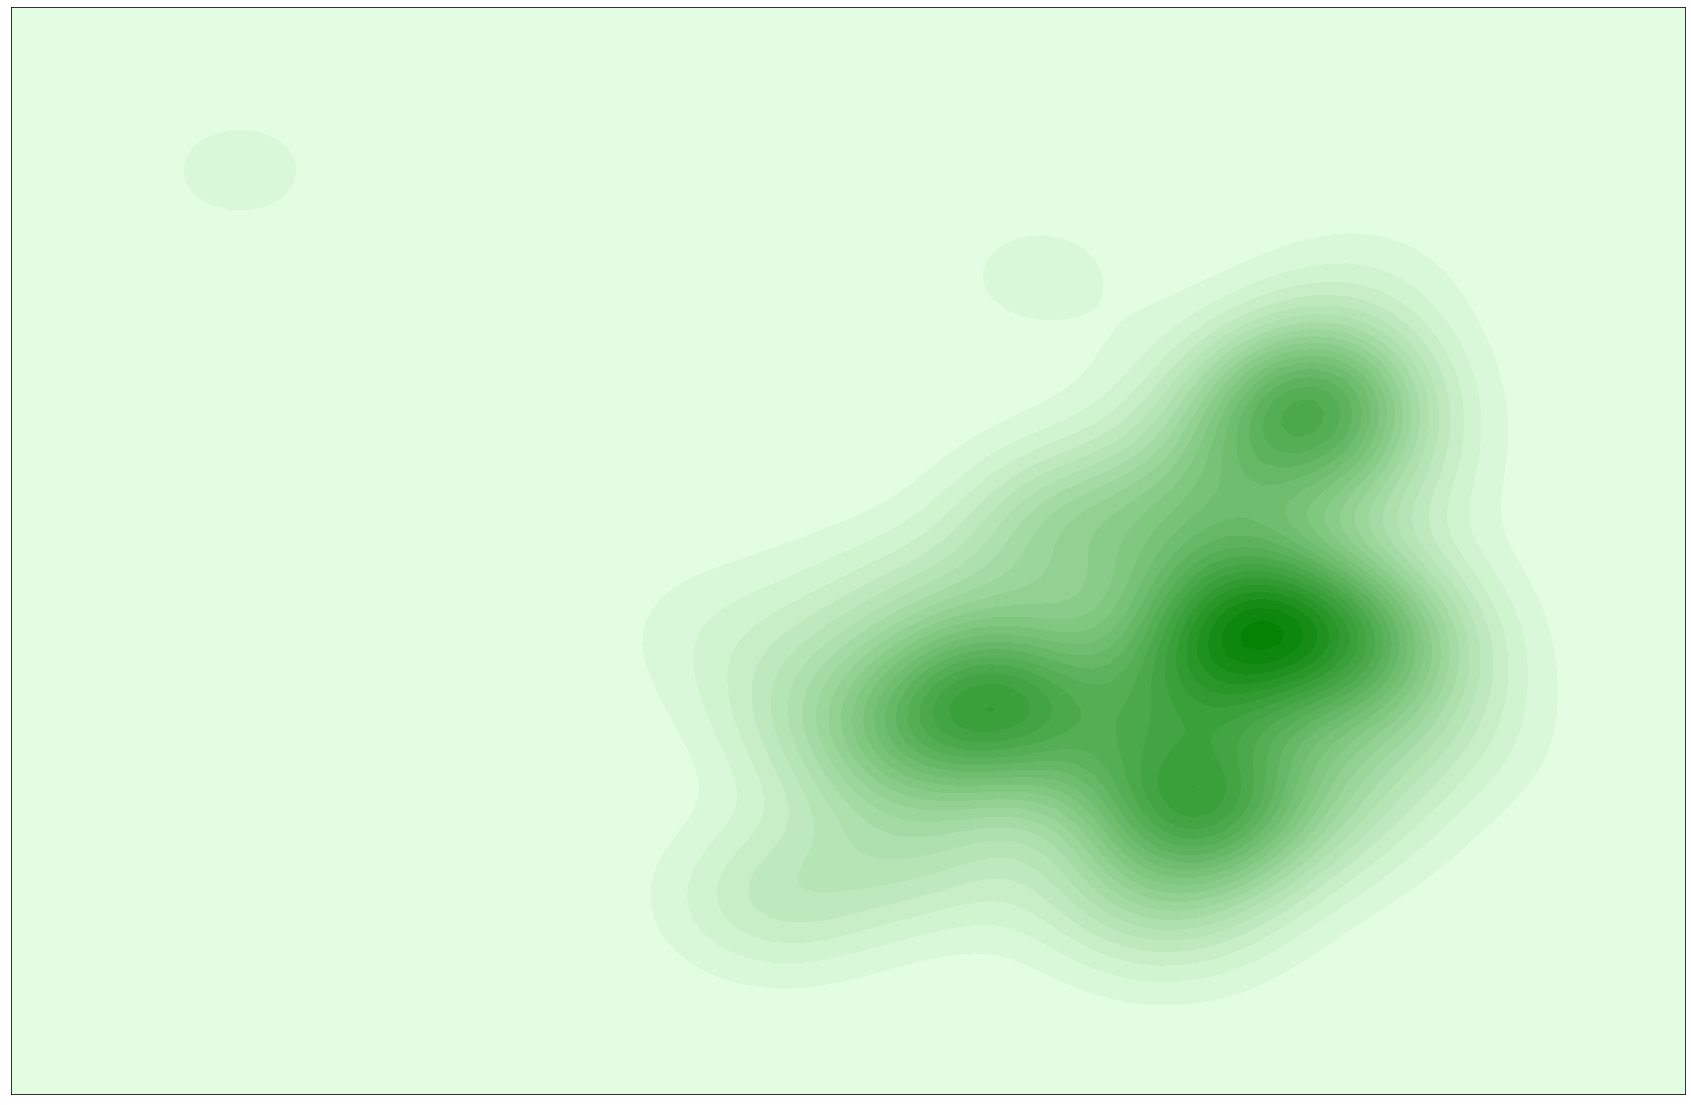

In [95]:
arr=np.concatenate(a,axis=0)
finalarr=arr.reshape(-1,2)
plt.figure(figsize=(30,20))
plt.xticks([])
plt.yticks([])
sns.kdeplot(finalarr[:,0], -1*finalarr[:,1], shade = "True", color = "green", n_levels = 30)


In [28]:
df_rand['shot_outcome_name'][df_rand['shot_outcome_name'].notna()]

215     Blocked
477       Saved
680       Saved
811       Saved
871       Off T
967       Saved
1223    Blocked
1529      Off T
1617    Blocked
1824      Off T
2027       Goal
2132      Saved
2161      Saved
2187    Blocked
2305      Off T
2688      Off T
2774       Goal
2928      Saved
3043    Blocked
3306    Blocked
3430      Saved
3604      Off T
3726    Blocked
3800      Saved
3836      Off T
3849      Off T
3938    Blocked
3945      Off T
Name: shot_outcome_name, dtype: object

In [ ]:
df683[df683[df683['shot_body_part_id'].notna()].iloc[0:1].notna()]

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,under_pressure,carry_end_location,pass_switch,pass_outcome_id,pass_outcome_name,...,shot_body_part_name,shot_technique_id,shot_technique_name,shot_freeze_frame,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_position_id,goalkeeper_position_name,duel_type_id,duel_type_name,duel_outcome_id,duel_outcome_name,pass_backheel,pass_cross,shot_first_time,goalkeeper_end_location,pass_aerial_won,foul_committed_advantage,foul_won_advantage,ball_recovery_recovery_failure,pass_deflected,dribble_outcome_id,dribble_outcome_name,foul_committed_card_id,foul_committed_card_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,pass_miscommunication,foul_committed_offensive,pass_goal_assist,pass_cut_back,dribble_overrun
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3445,NaN,NaN,N

In [ ]:
df683[df683['shot_body_part_id'].notna()].iloc[0:1].notna()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,under_pressure,carry_end_location,pass_switch,pass_outcome_id,pass_outcome_name,...,shot_body_part_name,shot_technique_id,shot_technique_name,shot_freeze_frame,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_position_id,goalkeeper_position_name,duel_type_id,duel_type_name,duel_outcome_id,duel_outcome_name,pass_backheel,pass_cross,shot_first_time,goalkeeper_end_location,pass_aerial_won,foul_committed_advantage,foul_won_advantage,ball_recovery_recovery_failure,pass_deflected,dribble_outcome_id,dribble_outcome_name,foul_committed_card_id,foul_committed_card_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,pass_miscommunication,foul_committed_offensive,pass_goal_assist,pass_cut_back,dribble_overrun
190,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df683.loc[190:190]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: ignored

In [ ]:
df683[df683['shot_body_part_id'].notna()].dropna(axis=1)

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,related_events,location,player_id,player_name,position_id,position_name,shot_statsbomb_xg,shot_end_location,shot_outcome_id,shot_outcome_name,shot_type_id,shot_type_name,shot_body_part_id,shot_body_part_name,shot_technique_id,shot_technique_name,shot_freeze_frame
190,1fedfc7b-ca22-4011-ae6c-136788fbbaec,191,1,00:03:25.578,3,25,10,0.664,16,Shot,217,Barcelona,1,Regular Play,217,Barcelona,[fb96f4fb-e472-462f-9b5b-12e63276361b],"[115.2, 54.4]",6400.0,Aleix Vidal Parreu,12.0,Right Midfield,0.066454,"[118.2, 44.0, 0.3]",100.0,Saved,87.0,Open Play,40.0,Right Foot,93.0,Normal,"[{'location': [114.6, 52.3], 'player': {'id': ..."
370,d2c171ca-45f0-4471-b84f-c0b484887802,371,1,00:08:10.965,8,10,23,1.108,16,Shot,217,Barcelona,6,From Counter,217,Barcelona,[bc9ac550-6f5f-4846-916c-709efc2e890d],"[109.3, 33.4]",5246.0,Luis Alberto Suárez Díaz,24.0,Left Center Forward,0.189028,"[120.0, 25.7, 0.5]",98.0,Off T,87.0,Open Play,38.0,Left Foot,93.0,Normal,"[{'location': [112.0, 33.5], 'player': {'id': ..."
416,afc37b2e-71e5-459e-8059-96d40f2d811e,417,1,00:09:52.953,9,52,26,0.123,16,Shot,211,Girona,3,From Free Kick,211,Girona,"[3c5127fe-5108-4013-9b2e-b3860247e33d, f6f3cfc...","[95.0, 28.1]",6888.0,Aleix García Serrano,13.0,Right Center Midfield,0.015126,"[99.0, 29.9]",96.0,Blocked,87.0,Open Play,38.0,Left Foot,93.0,Normal,"[{'location': [99.1, 29.9], 'player': {'id': 5..."
473,14fbbdea-245c-4017-b0e9-9a862c8cb6ba,474,1,00:11:51.952,11,51,31,0.738,16,Shot,211,Girona,1,Regular Play,211,Girona,[a003f515-bfa4-479b-b4a5-4e5210469b42],"[97.5, 47.7]",6574.0,Douglas Luiz Soares de Paulo,25.0,Secondary Striker,0.037241,"[117.6, 39.3, 0.9]",100.0,Saved,87.0,Open Play,40.0,Right Foot,93.0,Normal,"[{'location': [102.0, 46.2], 'player': {'id': ..."
645,3e83c678-f944-4163-9215-1c465cdeac78,646,1,00:16:05.543,16,5,36,1.142,16,Shot,217,Barcelona,3,From Free Kick,217,Barcelona,[1c9baff5-fa82-4034-b5ff-650aef5e2b82],"[87.2, 40.2]",5503.0,Lionel Andrés Messi Cuccittini,22.0,Right Center Forward,0.034310,"[118.5, 43.1, 1.6]",100.0,Saved,62.0,Free Kick,38.0,Left Foot,93.0,Normal,"[{'location': [95.7, 40.6], 'player': {'id': 6..."
649,c6b254fc-51df-4daf-b3e6-6bfefe908368,650,1,00:16:37.642,16,37,37,0.679,16,Shot,217,Barcelona,2,From Corner,217,Barcelona,"[4828b8ff-7538-4256-b7d2-423da5958586, e2aa3f2...","[101.0, 25.6]",5211.0,Jordi Alba Ramos,6.0,Left Back,0.018640,"[108.8, 38.7]",96.0,Blocked,87.0,Open Play,38.0,Left Foot,95.0,Volley,"[{'location': [110.0, 38.6], 'player': {'id': ..."
1368,ed57c35d-1f94-4f03-af35-39ef061f3791,1369,1,00:33:42.544,33,42,70,0.133,16,Shot,217,Barcelona,3,From Free Kick,217,Barcelona,[e4ea0961-60f1-40d7-95f8-8aae3fb2024e],"[109.8, 32.0]",5211.0,Jordi Alba Ramos,6.0,Left Back,0.119399,"[113.3, 35.2, 0.6]",100.0,Saved,87.0,Open Play,38.0,Left Foot,91.0,Half Volley,"[{'location': [109.9, 33.0], 'player': {'id': ..."
1462,4221ec47-3a06-4411-a6b8-74b811dbefa3,1463,1,00:35:24.653,35,24,75,0.996,16,Shot,217,Barcelona,1,Regular Play,217,Barcelona,[bcc7f03e-0cde-4c02-abcc-368396e1bbe0],"[89.0, 51.5]",5470.0,Ivan Rakitić,15.0,Left Center Midfield,0.012067,"[119.0, 43.3, 1.4]",100.0,Saved,87.0,Open Play,40.0,Right Foot,93.0,Normal,"[{'location': [93.4, 56.0], 'player': {'id': 6..."
1469,cd058edd-6511-4e02-98b3-fb34bba09928,1470,1,00:36:24.976,36,24,77,2.015,16,Shot,217,Barcelona,2,From Corner,217,Barcelona,[f5ca36ae-7bc9-4f86-9e29-7394af23e300],"[113.4, 44.9]",5542.0,José Paulo Bezzera Maciel Júnior,13.0,Right Center Midfield,0.115835,"[120.0, 18.2, 0.2]",98.0,Off T,87.0,Open Play,37.0,Head,93.0,Normal,"[{'location': [105.4, 30.3], 'player': {'id': ..."
1576,9deab522-44e1-46c3-adee-a69384cb75a2,1577,1,00:39:50.939,39,50,84,1.503,16,Shot,211,Girona,4,From Throw In,211,Girona,[a1723d8a-3db6-4f0a-853a-a8e72c1c5cce],"[107.8, 40.0]",6897.0,Michael Olunga Ogada,23.0,Center Forward,0.113514